# Trabalho da disciplina Projeto/MVP em Análise de Dados e Boas Práticas

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook apresentando as fases: Definição do problema; Coleta e análise de dados; e Pré-processamento de um projeto de ciência de dados.

**Descrição do Problema** - Criar um notebook apresentando as fases de definição do problema, coleta e análise de dados, e pré-processamento do dataset 'Productivity Prediction of Garment Employees'.

**Dataset** - O dataset inclui atributos do processo de fabricação de vestuário e a produtividade dos trabalhadores. A indústria do vestuário faz uso intensivo de mão de obra, com muitos processos sendo executados de forma manual. O atendimento da alta procura de produtos de vestuário depende do desempenho da produção e entrega dos trabalhores das empresas dessa indústria. O dataset pode ser utilizado para fins de regressão ou de classificação.

O dataset é composto de 1197 instâncias e 15 atributos.

Link para acessar o dataset - http://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

### Definição do Problema

### Coleta e Análise de Dados

Importa bibliotecas necessárias para a execução dos procedimentos implementados no notebook.

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from urllib.parse import quote
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile

# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score

Carrega o arquivo zip a partir da url, descompacta o arquivo e cria o dataset.

In [2]:
# Carga do dataset
uci_url = 'https://archive.ics.uci.edu/static/public/597/'
productivity_prediction_file = 'productivity+prediction+of+garment+employees.zip'
request = urllib.request.urlopen(uci_url + urllib.parse.quote(productivity_prediction_file))
zipfile = ZipFile(BytesIO(request.read()))
filepath = TextIOWrapper(zipfile.open('garments_worker_productivity.csv'), encoding='utf-8')
dataset = pd.read_csv(filepath, sep=',')

In [3]:
dataset.shape

(1197, 15)

In [4]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
dataset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


Apresenta informações sobre o dataset.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Attribute Information:

date: Date in MM-DD-YYYY

day: Day of the Week

quarter: A portion of the month. A month was divided into four quarters

department: Associated department with the instance

teamno: Associated team number with the instance

noofworkers: Number of workers in each team

noofstylechange: Number of changes in the style of a particular product

targetedproductivity: Targeted productivity set by the Authority for each team for each day.

smv: Standard Minute Value, it is the allocated time for a task

WIP: Work in progress. Includes the number of unfinished items for products

overtime: Represents the amount of overtime by each team in minutes

incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

idletime: The amount of time when the production was interrupted due to several reasons

idlemen: The number of workers who were idle due to production interruption

actual_productivity: The actual % of productivity that was delivered by the workers. It ranges from 0–1.

In [7]:
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Verificando os valores para alguns atributos

In [8]:
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [9]:
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [10]:
dataset['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [11]:
# Pode-se perceber pelos valores acima que o departamento finishing está duplicado, 
# isto ocorre pela presença de um branco no final de alguns itens da amostra, 
# o código abaixo faz a junção do itens num único departamento
dataset['department'] = dataset['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )

In [12]:
# Verificando a junção feita acima
dataset['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

Verificando a distribuição de cada atributo

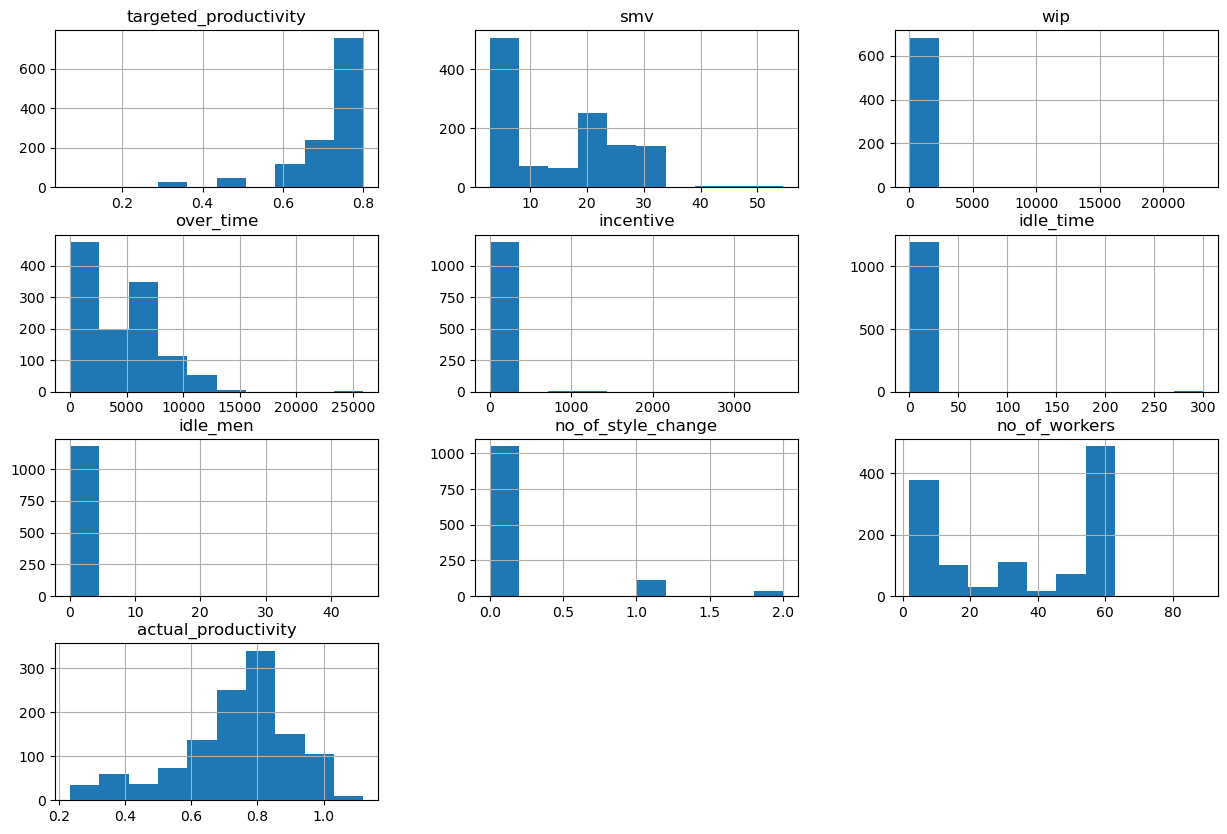

In [18]:
# Visualizando a distribuição dos atributos utilizando histogramas
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].hist(figsize = (15,10))
plt.show()

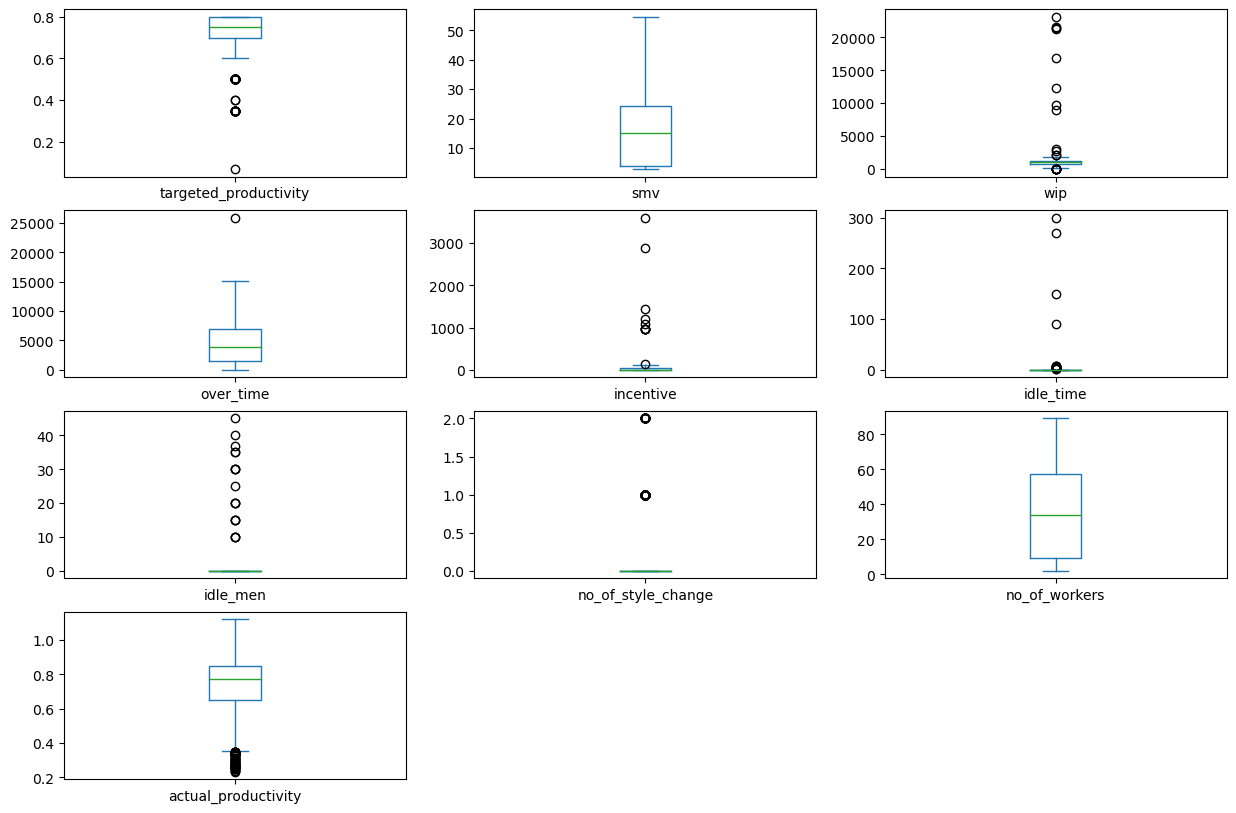

In [17]:
# Visualizando a distribuição dos atributos utilizando boxplots
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].plot(kind = 'box', subplots = True, layout = (4,3), sharey = False, figsize = (15,10))
plt.show()

Text(0.5, 1.0, 'team')

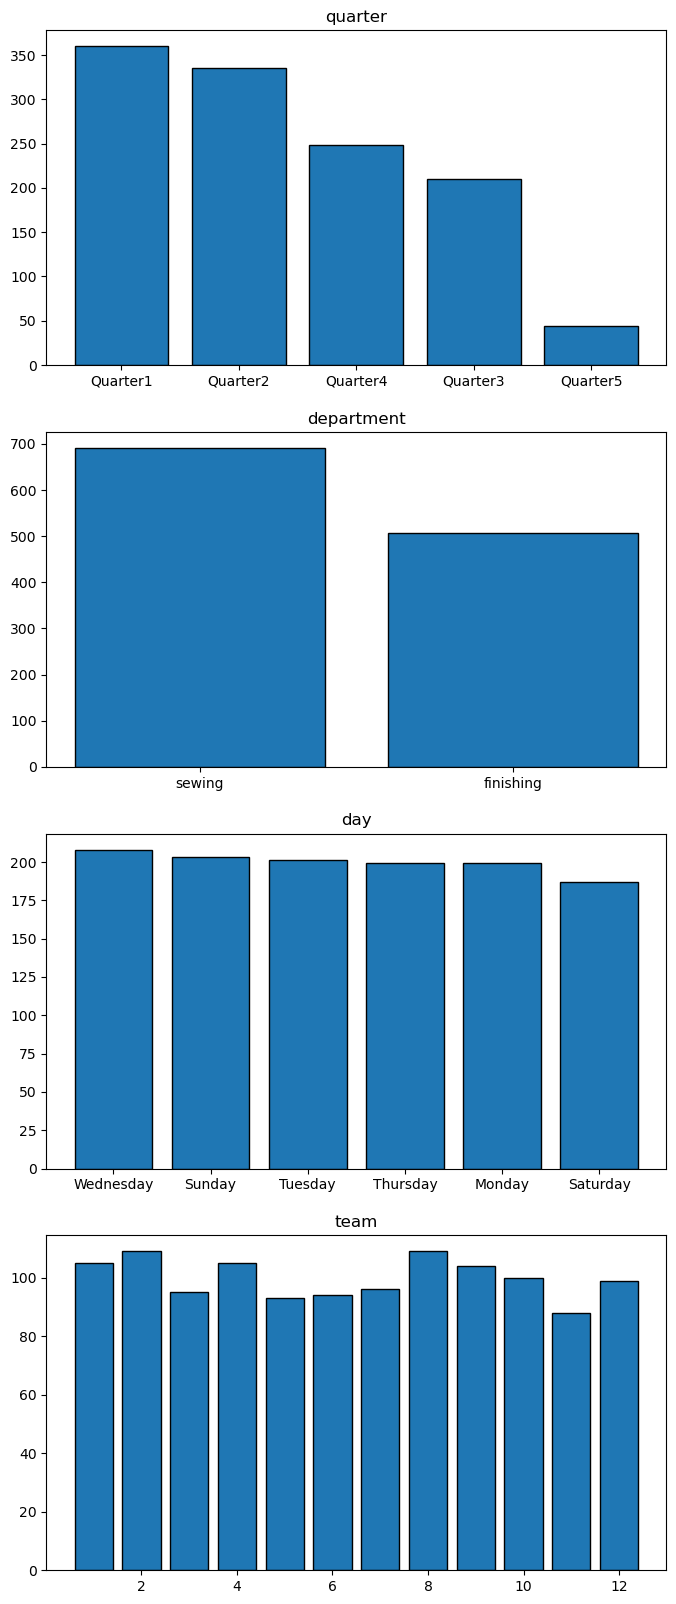

In [14]:
fig, ax = plt.subplots(4,1, figsize = (8,20))

ax[0].bar(dataset['quarter'].value_counts().keys(),dataset['quarter'].value_counts(),edgecolor='black')
ax[0].set_title('quarter')

ax[1].bar(dataset['department'].value_counts().keys(),dataset['department'].value_counts(),edgecolor='black')
ax[1].set_title('department')

ax[2].bar(dataset['day'].value_counts().keys(),dataset['day'].value_counts(),edgecolor='black')
ax[2].set_title('day')

ax[3].bar(dataset['team'].value_counts().keys(),dataset['team'].value_counts(),edgecolor='black')
ax[3].set_title('team')

In [22]:
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,0.421594,-0.122089,0.131147,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


<Axes: >

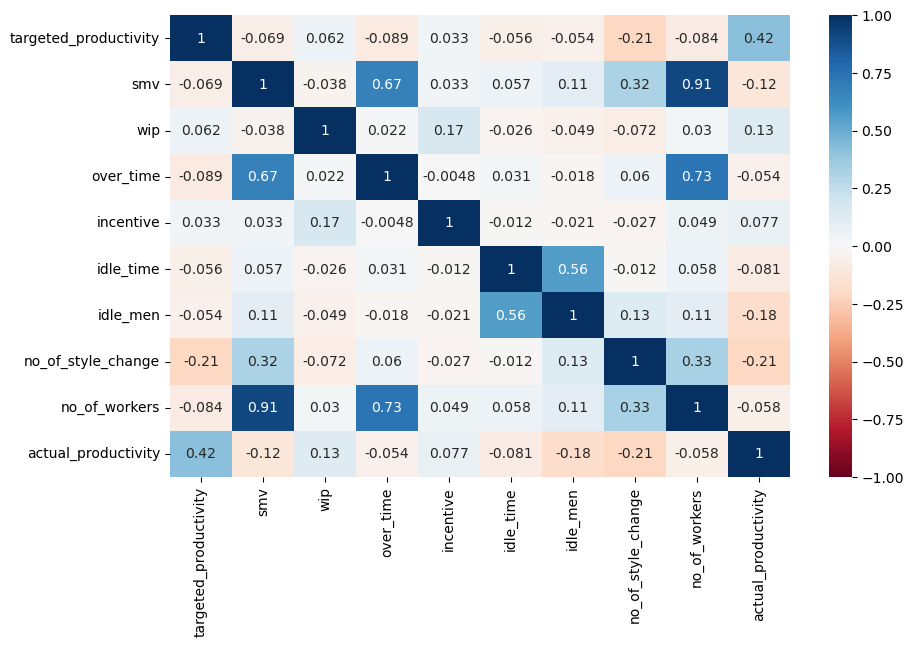

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(dataset[['targeted_productivity',
                     'smv',
                     'wip',
                     'over_time',
                     'incentive',
                     'idle_time',
                     'idle_men',
                     'no_of_style_change',
                     'no_of_workers',
                     'actual_productivity']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

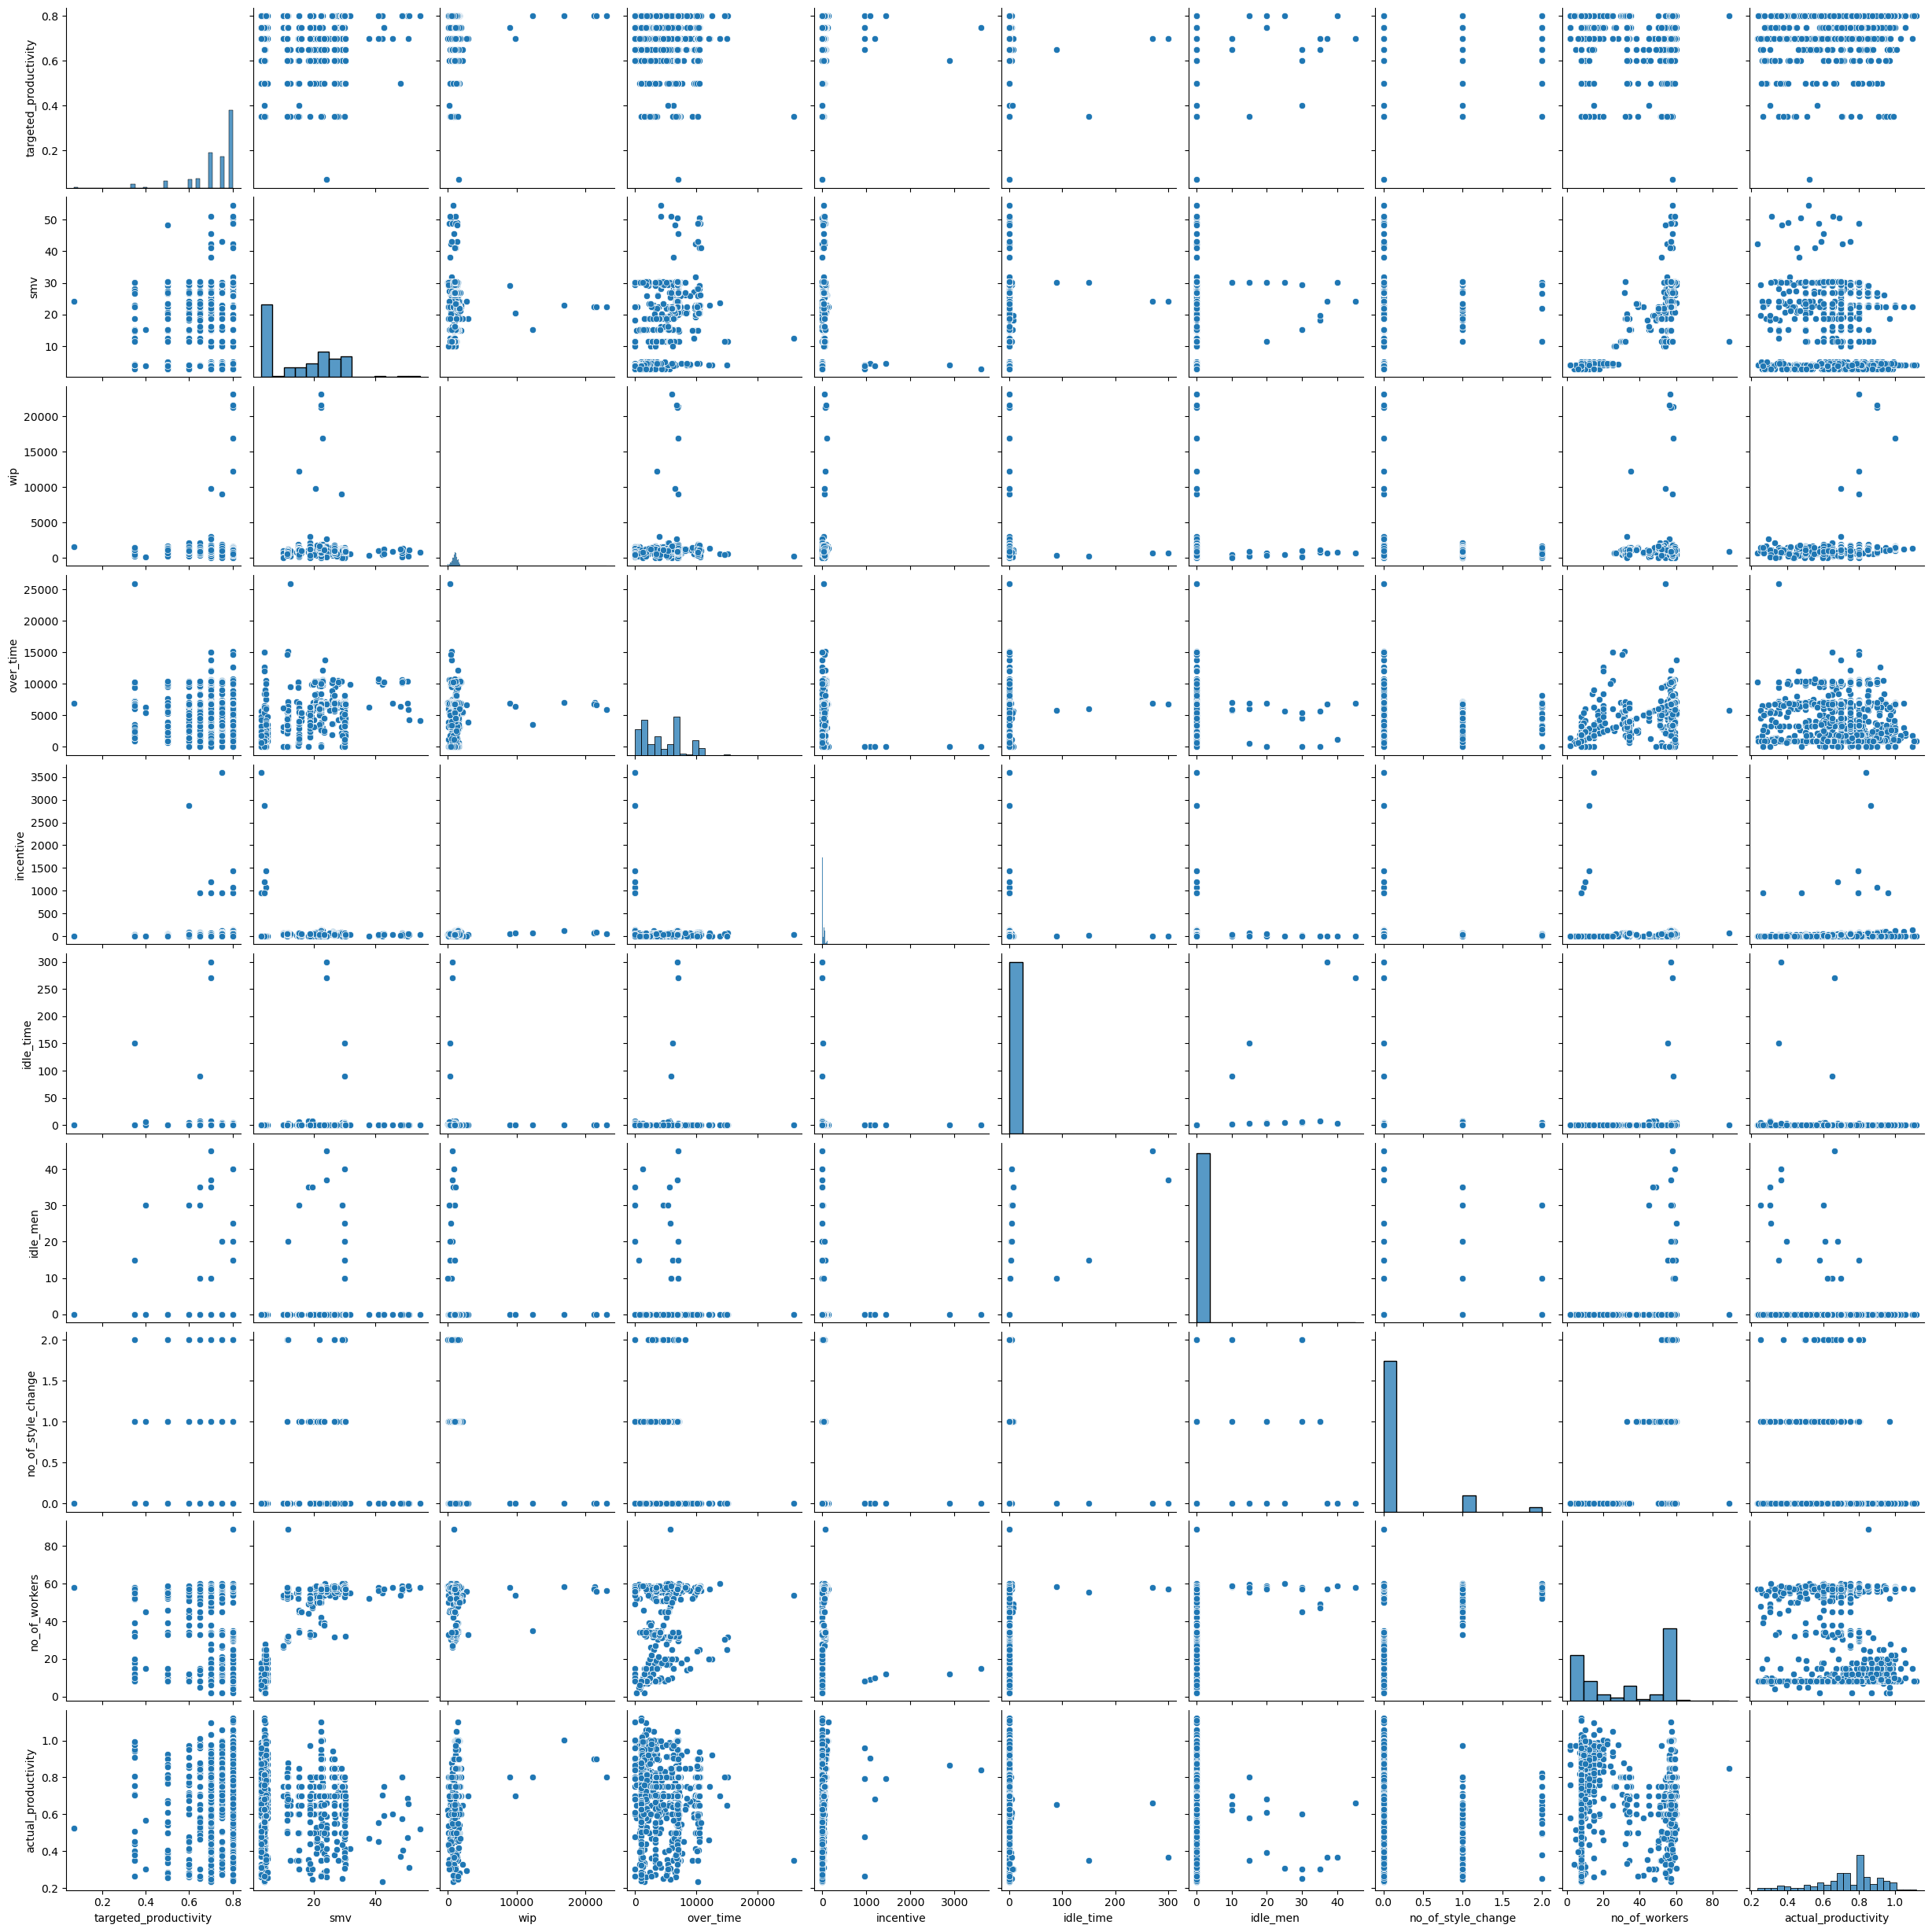

In [19]:
sns.pairplot(dataset[['targeted_productivity',
                      'smv',
                      'wip',
                      'over_time',
                      'incentive',
                      'idle_time',
                      'idle_men',
                      'no_of_style_change',
                      'no_of_workers',
                      'actual_productivity']])

### Pré-processamento de Dados

### Funções utilitárias

### Carga e preparação dos dados

Separa os dados do dataset em treino e teste.

In [5]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:36]
y = array[:,36]

**Seleção de atributos**

É utilizada a técnica de 'Seleção Univariada' para selecionar as variáveis que tenham maior relação com a variável de saída (target).

A rotina seleciona o melhor K e daí seleciona os atributos que correspondam a esse número.

In [6]:
# Seleção de atributos usando Seleção Univariada

# Calculando o melhor k
f1_score_list = []

model_LR = LogisticRegression(max_iter=200)

for k in range(1, 37):
    # Seleção de atributos com SelectKBest
    kbest_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação e obtém os atributos selecionados
    kbest_var.fit(X, y)

    # Reduz X para os atributos selecionados
    features = kbest_var.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

    model_LR.fit(X_train, y_train)
    kbest_pred = model_LR.predict(X_test)    

    f1_score_kbest = round(f1_score(y_test, kbest_pred, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

# O melhor k selecionado
kbest = f1_score_list.index(max(f1_score_list)) + 1

# Seleção de atributos com o melhor k
kbest_var = SelectKBest(score_func=f_classif, k=kbest)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = kbest_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset.columns[0:36])

# Exibe as pontuações de cada atributo e os escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) 
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", kbest_var.get_feature_names_out(input_features=dataset.columns[0:36]))

X = features


Número original de atributos: 36

Número reduzido de atributos: 13

Atributos Originais: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem 

### Criação de Pipelines

Define os folds para a validação cruzada. Serão utilizadas 10 partições em sua configuração.

In [7]:
# Criando os folds para a validação cruzada
num_splits = 10
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

Configuração e avaliação dos modelos.

KNN: 0.704117 (0.028161)
CART: 0.677641 (0.015503)
NB: 0.717349 (0.033303)
SVM: 0.726404 (0.024232)
LR: 0.760966 (0.031134)
Bagging: 0.751280 (0.021899)
RF: 0.757410 (0.024318)
ET: 0.745458 (0.022584)
Ada: 0.748685 (0.027233)
GB: 0.765153 (0.026484)
Voting: 0.751599 (0.026791)


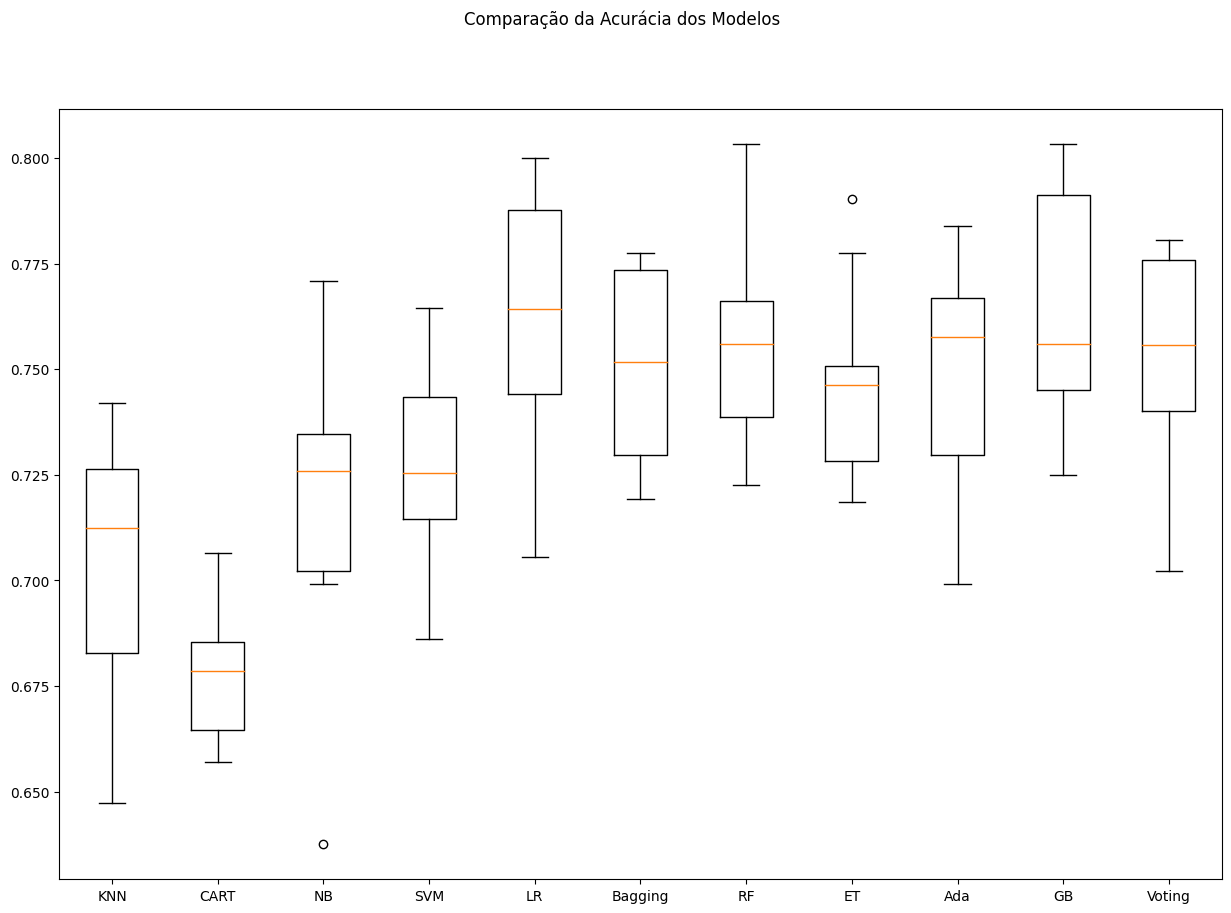

In [8]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(42)

# Divindindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

# Listas para aramazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('Logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criando os elementos do Pipeline. Definição de algoritmos e transformações que serão utilizadas.

In [9]:
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

Configuração e avaliação dos Pipelines.

LR-orig: 0.760966 (0.031134)
RF-orig: 0.761289 (0.026021)
GB-orig: 0.764830 (0.026588)
LR-padr: 0.760643 (0.028780)
RF-padr: 0.755805 (0.018721)
GB-padr: 0.765476 (0.026218)
LR-norm: 0.749655 (0.028323)
RF-norm: 0.757408 (0.025316)
GB-norm: 0.764830 (0.026588)


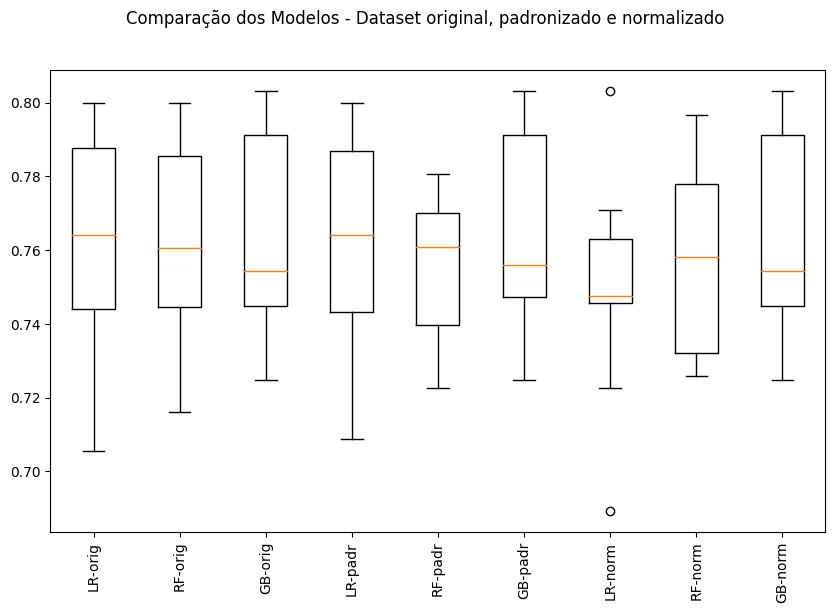

In [10]:
# Montando os pipelines

# Lista para armazenar os pipelines
pipelines = []

# Listas para aramazenar os resultados e os nomes dos modelos
results = []
names = []

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))

# Dataset padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))

# Dataset normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos selecionados
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização de Hiperparâmetros

Baseado no resultado da acurácia da execução dos Pipelines, foram selecionados os algoritmos de Regressão Logistica, Random Forest e Gradient Boosting, para a aplicação de hiperparâmetros a fim de encontrar o melhor modelo.

In [11]:
# tuning da Regressão Logistica

pipelines_reg_log = []

# definindo os componentes do pipeline
pipelines_reg_log.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines_reg_log.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines_reg_log.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))

param_grid= {
    'LR__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'LR__C' : np.logspace(-4, 4, 20),
    'LR__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'LR__max_iter' : [100, 1000,2500, 5000]
}

# prepara e executa o GridSearchCV
for name, model in pipelines_reg_log:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: LR-orig - Melhor: 0.766139 usando {'LR__C': 4.281332398719396, 'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-padr - Melhor: 0.763232 usando {'LR__C': 0.615848211066026, 'LR__max_iter': 100, 'LR__penalty': 'l1', 'LR__solver': 'saga'}
Sem tratamento de missings: LR-norm - Melhor: 0.762906 usando {'LR__C': 0.0001, 'LR__max_iter': 100, 'LR__penalty': 'none', 'LR__solver': 'lbfgs'}


In [12]:
# Tuning do Random Forest

pipelines_random_forest = []

# Definindo os componentes do pipeline
pipelines_random_forest.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines_random_forest.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines_random_forest.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = [{
    'RF__n_estimators':[10,100,200],
    'RF__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_random_forest:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: RF-orig - Melhor: 0.760644 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-padr - Melhor: 0.760318 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-norm - Melhor: 0.759999 usando {'RF__max_features': 1, 'RF__n_estimators': 200}


In [13]:
# Tuning do Gradient Boosting

pipelines_gradient_boosting = []

# Definindo os componentes do pipeline
pipelines_gradient_boosting.append(('GB-orig', Pipeline(steps=[gradient_boosting])))
pipelines_gradient_boosting.append(('GB-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines_gradient_boosting.append(('GB-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = [{
    'GB__n_estimators':[10,100,200],
    'GB__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_gradient_boosting:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: GB-orig - Melhor: 0.763865 usando {'GB__max_features': 3, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-padr - Melhor: 0.762258 usando {'GB__max_features': 1, 'GB__n_estimators': 200}
Sem tratamento de missings: GB-norm - Melhor: 0.765804 usando {'GB__max_features': 1, 'GB__n_estimators': 200}


Execução do modelo com a melhor configuração de hiperparâmetros e dados de teste.

In [23]:
# avaliação do modelo com o conjunto de testes

# preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

reg_log = ('LR', LogisticRegression(max_iter=100, C=4.281332398719396, penalty='l2', solver='lbfgs'))
model = Pipeline([reg_log])

model.fit(rescaledX, y_train)

# estimativa da acurácia no conjunto de teste
rescaledTextX = scaler.transform(X_test)
predictions = model.predict(rescaledTextX)
print(accuracy_score(y_test, predictions))

0.7703313253012049


### Teste do modelo com todo o dataset

Preparação do modelo.

In [24]:
# preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

Pipeline(steps=[('LR', LogisticRegression(C=4.281332398719396))])

Teste do modelo com classe de saída não informada.

In [25]:
# novos dados - não sabemos a classe
data = {
"Application mode": [17],
"Debtor": [0],
"Tuition fees up to date": [1],
"Gender": [1],
"Scholarship holder": [0],
"Age at enrollment": [20],
"Curricular units 1st sem (enrolled)": [0],
"Curricular units 1st sem (evaluations)": [0],
"Curricular units 1st sem (approved)": [0],
"Curricular units 1st sem (grade)": [0.0],
"Curricular units 2nd sem (enrolled)": [0],
"Curricular units 2nd sem (evaluations)": [0],
"Curricular units 2nd sem (approved)": [0],
"Curricular units 2nd sem (grade)": [0.0],
}

atributos = ["Application mode","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","Curricular units 1st sem (enrolled)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.095 -0.358  0.368  1.358 -0.575 -0.43  -2.529 -1.521 -2.197 -2.838
  -2.043 -1.472 -1.963]]


Predição com os dados informados.

In [26]:
# predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

['Dropout']


### Sumário

Na preparação do modelo para uso na classificação do dataset, foi feita uma operação de seleção de atributos. Do dataset inicial de 36 atributos, a operação de seleção reduziu esse conjunto para 13 atributos, essa redução permitiu um desempenho melhor na execução do algoritmo de classificação. Na busca do melhor modelo, foi utilizada cross-validation e a criação de pipelines de modelos. A otimização de hiperparâmetros implementada evidenciou que o algoritmo de Regressão Logistica apresentou o melhor resultado considerando a acurácia. Os hiperparâmetros levantados foram ('LR__C': 4.281332398719396, 'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'). Com eles a acurácia obtida foi de 0.7703313253012049. 